In [ ]:
#TASK 1 - Install matplotlib and deap
# - Import all necessary libraries
!pip install matplotlib deap
import matplotlib.pyplot as plt
from deap import base, creator,tools, algorithms
import random
import numpy as np

In [36]:
# TODO: Task 2 - Define the number of locations and vehicles
num_locations =10
locations = [(random.randint(0,100),random.randint(0,100))for _ in range(num_locations)]
depot = (50,50)
num_vehicles = 3

In [37]:
# TASK 3 - Genetic Algorithm Setup
# - Figure out how to represent an individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [38]:
#TASK 4 - Starting with the toolbox and tools
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

In [39]:
# def evalVRP(individual):
#     distance = []
#     initial = ((((depot[0] - locations[individual[0]][0]) ** 2) ** 0.5) + (((depot[1] - locations[individual[0]][1]) ** 2) ** 0.5))

#     distance.append(initial)

#     for i in range(len(individual) - 1):
#         distance.append((((locations[individual[i]][0] - locations[individual[i + 1]][0]) ** 2) ** 0.5) + (((locations[individual[i]][1] - locations[individual[i + 1]][1]) ** 2) ** 0.5))
#     end = ((((locations[individual[- 1]][0] - depot[0]) ** 2) ** 0.5) + (((locations[individual[- 1]][1] - depot[1]) ** 2) ** 0.5))

#     distance.append(end)

#     total_distance = sum(distance)
#     total_deviation = np.std(distance)

#     return total_distance, total_deviation

In [40]:
#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [41]:
#TASK 6 - Register the evaluate function in the toolbox
toolbox.register("evaluate", evalVRP)

In [42]:
# TODO: Task 7 - Configure the genetic operators
toolbox.register("mate",tools.cxPartialyMatched)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.2)
toolbox.register("select",tools.selRoulette)

In [43]:
  # SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min    
0  	300   	403.257	1.08515
1  	235   	400.292	4.11068
2  	221   	400.516	1.26104
3  	230   	398.77 	1.37793
4  	236   	397.696	1.67947
5  	240   	399.541	2.76426
6  	223   	401.477	2.00268
7  	222   	402.021	2.5104 
8  	233   	403.36 	2.72893
9  	236   	404.71 	1.81656
10 	245   	403.968	2.32901
11 	232   	402.777	2.31738
12 	251   	404.05 	7.54751
13 	235   	404.238	5.53877
14 	232   	401.909	2.1665 
15 	216   	403.711	2.1665 
16 	236   	401.061	2.1665 
17 	216   	403.342	4.07883
18 	225   	402.679	1.42092
19 	210   	404.48 	1.42092
20 	232   	403.343	1.83364
21 	223   	405.074	2.91445
22 	234   	407.632	4.51377
23 	217   	406.694	3.93933
24 	229   	406.118	3.20735
25 	213   	405.516	5.21504
26 	225   	400.331	4.77779
27 	230   	397.648	4.30137
28 	237   	403.447	2.96888
29 	229   	403.774	1.83694
30 	244   	402.099	4.78065
31 	233   	402.376	2.18151
32 	238   	405.709	1.91346
33 	241   	404.829	1.91346
34 	217   	401.515	3.0304 
35 	218   	401.405	4.17051
3

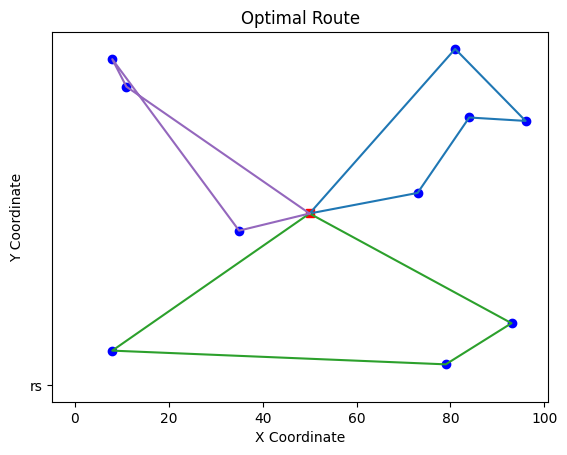

In [44]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
    main()